In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
## Create a dataframe from scratch using dict
temp_dict = {"fruit":["Apple", "Banana"],
            "Drinks":["Fanta","Coke"]}
temp_dict

{'fruit': ['Apple', 'Banana'], 'Drinks': ['Fanta', 'Coke']}

In [6]:
pd.DataFrame(temp_dict)

,fruit,Drinks
0,Apple,Fanta
1,Banana,Coke


In [7]:
## List to DataFrame
a =[1,2,3]
b =['a','b','c']
pd.DataFrame([a,b])   

,0,1,2
0,1,2,3
1,a,b,c


In [10]:
temp = pd.DataFrame([a,b]).T # Transpose
temp.columns = ["first","second"]
temp

,first,second
0,1,a
1,2,b
2,3,c


In [14]:
## Titanic
df = sns.load_dataset('titanic')
df.head(2) # Gives top 5 row ## df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [16]:
df.shape

(891, 15)

In [17]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [19]:
df['survived'] = df['survived'].astype('category')
df['pclass'] = df['pclass'].astype('category')
df.dtypes

survived       category
pclass         category
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [21]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
df.describe()

,age,sibsp,parch,fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [28]:
### Fill the Null age values with mean value of age
avg_age = round(df['age'].mean(),0)    #int(df['age'].mean())
avg_age

30.0

In [29]:
df.shape

(891, 15)

In [30]:
df['age_av'] = df['age'].fillna(avg_age)
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_av           0
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

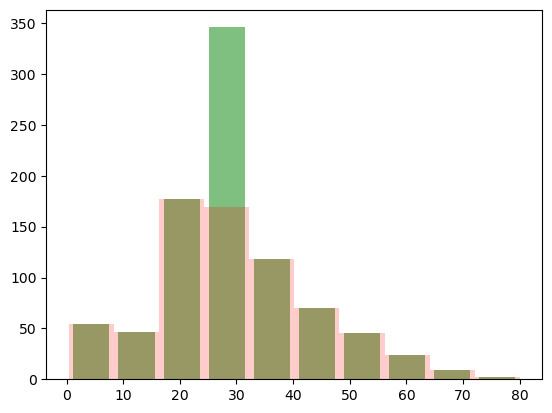

In [44]:
plt.hist(df['age_av'], color ='g', rwidth = 0.8, alpha =0.5)
plt.hist(df['age'], color ='red', alpha = 0.2)

In [45]:
## forward fill
df['age_ffill'] = df['age'].fillna(method = 'ffill')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

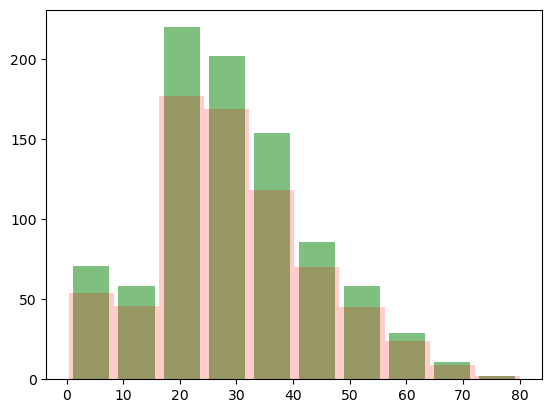

In [46]:
plt.hist(df['age_ffill'], color ='g', rwidth = 0.8, alpha =0.5)
plt.hist(df['age'], color ='red', alpha = 0.2)

In [48]:
## Linear Interpolation
df['age_lin'] = df['age'].interpolate(method = 'linear')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

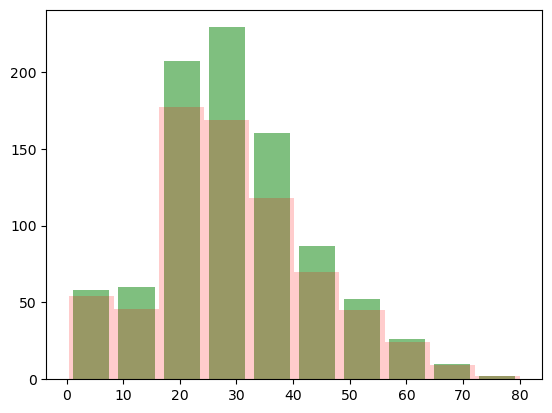

In [49]:
plt.hist(df['age_lin'], color ='g', rwidth = 0.8, alpha =0.5)
plt.hist(df['age'], color ='red', alpha = 0.2)

In [50]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_av', 'age_ffill', 'age_lin'],
      dtype='object')

In [56]:
df['age_diff'] = df['age'] + df['age_ffill']**2

In [57]:
df[['age_diff','age','age_ffill']].head()

,age_diff,age,age_ffill
0,506.0,22.0,22.0
1,1482.0,38.0,38.0
2,702.0,26.0,26.0
3,1260.0,35.0,35.0
4,1260.0,35.0,35.0


## Conditional Filtering

In [58]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_av           0
age_ffill        0
age_lin          0
age_diff       177
dtype: int64

In [59]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_av,age_ffill,age_lin,age_diff
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0,1482.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0,3906.0


In [62]:
df_embark_nn = df[~df['embark_town'].isnull()]
df_embark_nn

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_av,age_ffill,age_lin,age_diff
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,22.0,506.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,38.0,1482.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,26.0,702.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,35.0,1260.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,35.0,1260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.0,27.0,27.0,756.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.0,19.0,19.0,380.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,30.0,19.0,22.5,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.0,26.0,26.0,702.0


In [64]:
df[(df['fare']>30) & (df['age']>50)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_av,age_ffill,age_lin,age_diff
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0,54.0,54.0,2970.0
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False,65.0,65.0,65.0,4290.0
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True,71.0,71.0,71.0,5112.0
124,0,1,male,54.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False,54.0,54.0,54.0,2970.0
155,0,1,male,51.0,0,1,61.3792,C,First,man,True,NaN,Cherbourg,no,False,51.0,51.0,51.0,2652.0
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True,61.0,61.0,61.0,3782.0
174,0,1,male,56.0,0,0,30.6958,C,First,man,True,A,Cherbourg,no,True,56.0,56.0,56.0,3192.0
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True,58.0,58.0,58.0,3422.0
262,0,1,male,52.0,1,1,79.6500,S,First,man,True,E,Southampton,no,False,52.0,52.0,52.0,2756.0
268,1,1,female,58.0,0,1,153.4625,S,First,woman,False,C,Southampton,yes,False,58.0,58.0,58.0,3422.0


In [65]:
df[(df['fare']>30) | (df['age']>50)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_av,age_ffill,age_lin,age_diff
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,38.0,1482.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,35.0,1260.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0,54.0,54.0,2970.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0,14.0,14.0,210.0
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,58.0,58.0,58.0,3422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True,51.0,51.0,51.0,2652.0
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,30.0,48.0,36.0,NaN
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True,31.0,31.0,31.0,992.0
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,47.0,47.0,47.0,2256.0


## Grouping

In [67]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [71]:
## Groupby is always followed by aggregation
df.groupby('sex')['fare'].mean()#.sum()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [72]:
df.groupby(['sex','survived'])['fare'].mean()

sex     survived
female  0           23.024385
        1           51.938573
male    0           21.960993
        1           40.821484
Name: fare, dtype: float64

In [73]:
#Correlation coeff
df.corr()

,age,sibsp,parch,fare,adult_male,alone,age_av,age_ffill,age_lin,age_diff
age,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270,1.000000,1.000000,1.000000,0.954542
sibsp,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471,-0.232440,-0.206104,-0.213410,-0.214037
parch,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398,-0.180330,-0.165191,-0.170013,-0.112680
fare,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.090632,0.083417,0.087119,0.096798
adult_male,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744,0.254145,0.209118,0.220055,0.206870
alone,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000,0.181165,0.165588,0.169425,0.129482
age_av,1.000000,-0.232440,-0.180330,0.090632,0.254145,0.181165,1.000000,0.893139,0.935235,0.954542
age_ffill,1.000000,-0.206104,-0.165191,0.083417,0.209118,0.165588,0.893139,1.000000,0.950992,0.954542
age_lin,1.000000,-0.213410,-0.170013,0.087119,0.220055,0.169425,0.935235,0.950992,1.000000,0.954542
age_diff,0.954542,-0.214037,-0.112680,0.096798,0.206870,0.129482,0.954542,0.954542,0.954542,1.000000


<AxesSubplot:>

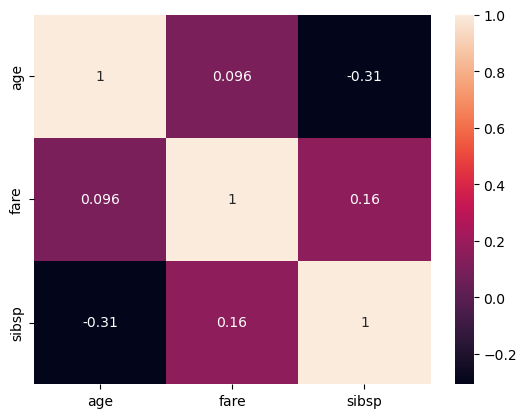

In [75]:
## Heatmap
sns.heatmap(df[['age','fare','sibsp']].corr(), annot = True)

## Datetime using Pandas

In [77]:
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
data = pd.read_csv(url,sep=",")
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [78]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [79]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [80]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [81]:
## Set Date column as index
data = data.set_index('Date')
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [82]:
data.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [83]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [85]:
# Set frequency of data to daily
data_freq = data.asfreq('D')
data_freq.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

In [86]:
data.shape, data_freq.shape

((4383, 4), (4383, 4))

In [87]:
data_freq.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [88]:
## Resample to Weekly
data_columns = ['Consumption','Wind','Solar','Wind+Solar']
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [102]:
## Rolling average ( 7 day)
data_7d_rol = data[data_columns].rolling(window =7).mean()
data_7d_rol.head(20)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN
2006-01-07,1361.471429,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-09,1402.557571,NaN,NaN,NaN


In [101]:
data.head(20)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [103]:
data_365d_rol = data[data_columns].rolling(window =365).mean()

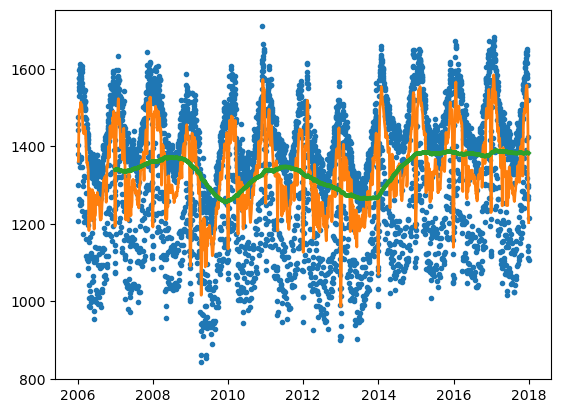

In [106]:
plt.plot(data['Consumption'], marker = ".", linestyle = "None")
plt.plot(data_7d_rol['Consumption'], linewidth =2) 
plt.plot(data_365d_rol['Consumption'], linewidth =3)

In [107]:
## Splitting date
import datetime
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [108]:
data['Year'] = data.index.year
data.head()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006
